# **Customer segmentation using RFM**

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

cur_date=df["InvoiceDate"].max()


rec_data=df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
rec_data["Recency"]=(cur_date-rec_data["InvoiceDate"]).dt.days

print(rec_data[["CustomerID","Recency"]].head())


   CustomerID  Recency
0     12346.0      325
1     12347.0        1
2     12348.0       74
3     12349.0       18
4     12350.0      309


In [ ]:
freq_data=df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
freq_data.columns=["CustomerID","Frequency"]

print(freq_data.head())

   CustomerID  Frequency
0     12346.0          2
1     12347.0          7
2     12348.0          4
3     12349.0          1
4     12350.0          1


In [ ]:
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
mon_data=df.groupby("CustomerID")["TotalPrice"].sum().reset_index()
mon_data.columns=["CustomerID","Monetary"]

print(mon_data.head())

   CustomerID  Monetary
0     12346.0      0.00
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40


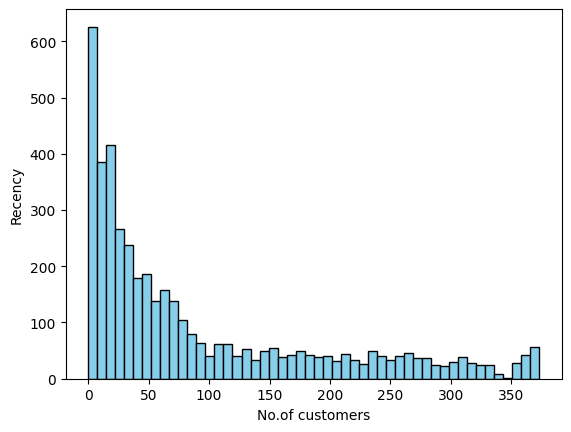

In [ ]:
import matplotlib.pyplot as plt

plt.hist(rec_data["Recency"],bins=50,color='skyblue',edgecolor='black')
plt.xlabel("No.of customers")
plt.ylabel("Recency")
plt.show()


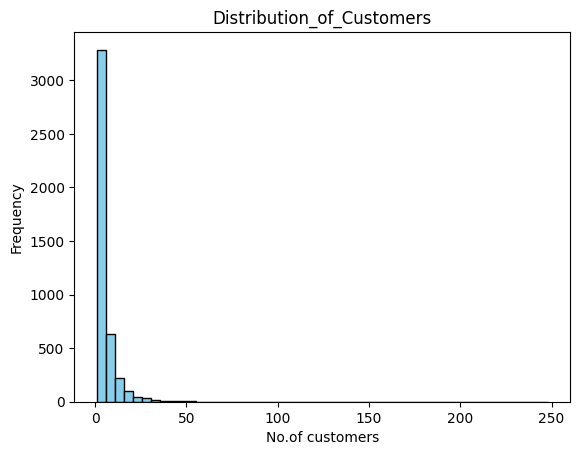

In [ ]:
plt.hist(freq_data["Frequency"],bins=50,color='skyblue',edgecolor='black')
plt.title("Distribution_of_Customers")
plt.xlabel("No.of customers")
plt.ylabel("Frequency")
plt.show()


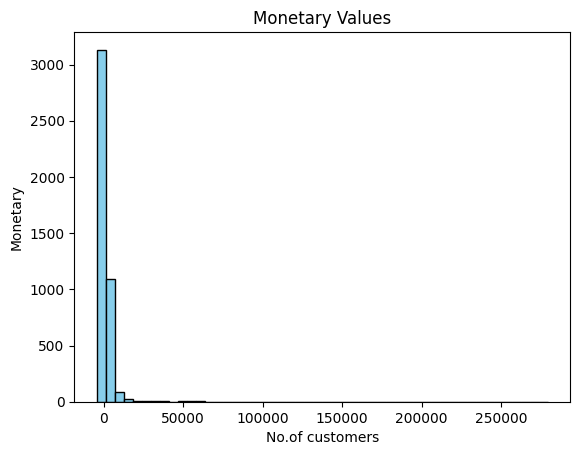

In [ ]:
plt.hist(mon_data["Monetary"],bins=50,color='skyblue',edgecolor='black')
plt.title("Monetary Values")
plt.xlabel("No.of customers")
plt.ylabel("Monetary")
plt.show()


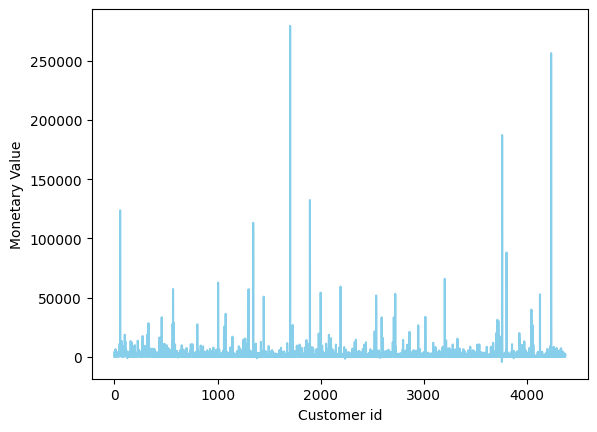

In [ ]:


plt.plot(mon_data["Monetary"],color='skyblue')
plt.xlabel("Customer id")
plt.ylabel("Monetary Value")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      CustomerID  Recency  Frequency  Monetary  Cluster
0        12346.0      325          2      0.00        0
1        12347.0        1          7   4310.00        0
2        12348.0       74          4   1797.24        0
3        12349.0       18          1   1757.55        0
4        12350.0      309          1    334.40        0
...          ...      ...        ...       ...      ...
4367     18280.0      277          1    180.60        0
4368     18281.0      180          1     80.82        0
4369     18282.0        7          3    176.60        0
4370     18283.0        3         16   2045.53        0
4371     18287.0       42          3   1837.28        0

[4372 rows x 5 columns]


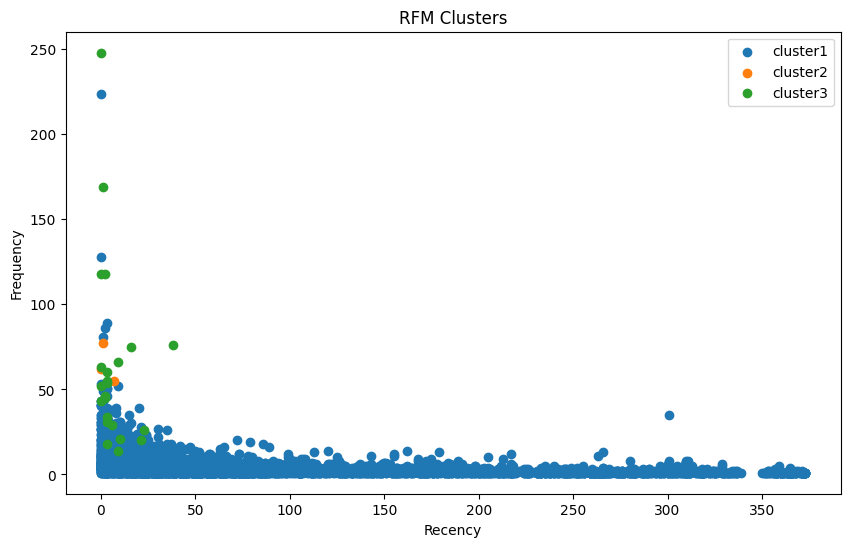

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

rfm_data=pd.merge(rec_data,freq_data,on="CustomerID")

rfm_data=pd.merge(rfm_data,mon_data,on="CustomerID")

X=rfm_data[["CustomerID","Recency","Frequency","Monetary"]]
num_clusters=3

kmeans=KMeans(n_clusters=num_clusters,random_state=42)

rfm_data['Cluster']=kmeans.fit_predict(X)

print(rfm_data[["CustomerID","Recency","Frequency","Monetary","Cluster"]])

plt.figure(figsize=(10,6))
for cluster in range(num_clusters):
  cluster_data=rfm_data[rfm_data["Cluster"]==cluster]
  plt.scatter(cluster_data["Recency"],cluster_data["Frequency"],label=f'cluster{cluster+1}')

plt.title("RFM Clusters")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
rfm_data['R_rank']=rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank']=rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank']=rfm_data['Monetary'].rank(ascending=True)

In [ ]:
rfm_data['R_rank_norm']=(rfm_data['R_rank']/rfm_data['R_rank'].max())*100

rfm_data['F_rank_norm']=(rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm']=(rfm_data['M_rank']/rfm_data['M_rank'].max())*100

In [ ]:
rfm_data.drop(columns=["R_rank","F_rank","M_rank"],inplace=True)
rfm_data.head()

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Cluster,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,2011-01-18 10:17:00,325,2,0.00,0,3.865741,39.387008,1.063586
1,12347.0,2011-12-07 15:52:00,1,7,4310.00,0,97.719907,81.427264,92.726441
2,12348.0,2011-09-25 13:13:00,74,4,1797.24,0,38.182870,64.249771,77.721866
3,12349.0,2011-11-21 09:51:00,18,1,1757.55,0,72.974537,15.027447,77.127173
4,12350.0,2011-02-02 16:01:00,309,1,334.40,0,5.578704,15.027447,29.940531


In [ ]:
rfm_data["RFM"]=0.20*rfm_data["R_rank_norm"]+0.30*rfm_data["F_rank_norm"]+0.50*rfm_data["M_rank_norm"]

rfm_data["RFM"]*=0.05

rfm_data=rfm_data.round(2)
rfm_data[["CustomerID","RFM"]].head(10)

,CustomerID,RFM
0,12346.0,0.66
1,12347.0,4.52
2,12348.0,3.29
3,12349.0,2.88
4,12350.0,1.03
5,12352.0,3.79
6,12353.0,0.50
7,12354.0,2.00
8,12355.0,1.38
9,12356.0,3.67


In [ ]:
rfm_data["Customer_segment"]=np.where(rfm_data["RFM"]>4.5,"Top_Customers",(np.where(rfm_data["RFM"]>4,"High_Value_Customers",(np.where(rfm_data["RFM"]>3,"Medium_value_customers",np.where(rfm_data["RFM"]>1.5,"Low_value_customers",'last_Customers'))))))


rfm_data[['CustomerID','RFM','Customer_segment']]

,CustomerID,RFM,Customer_segment
0,12346.0,0.66,last_Customers
1,12347.0,4.52,Top_Customers
2,12348.0,3.29,Medium_value_customers
3,12349.0,2.88,Low_value_customers
4,12350.0,1.03,last_Customers
...,...,...,...
4367,18280.0,0.67,last_Customers
4368,18281.0,0.52,last_Customers
4369,18282.0,2.04,Low_value_customers
4370,18283.0,4.37,High_Value_Customers


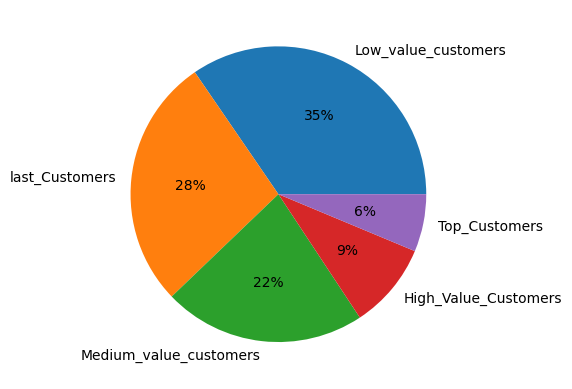

In [ ]:
plt.pie(rfm_data.Customer_segment.value_counts(),labels=rfm_data.Customer_segment.value_counts().index,autopct='%.0f%%')
plt.show()

In [ ]:
df=pd.read_excel("/content/Sample - Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df["Order Date"]=pd.to_datetime(df["Order Date"])

cur_date=df["Order Date"].max()


rec_data=df.groupby("Customer ID")["Order Date"].max().reset_index()
rec_data["Recency"]=(cur_date-rec_data["Order Date"]).dt.days

print(rec_data[["Customer ID","Recency"]].head())

  Customer ID  Recency
0    AA-10315      184
1    AA-10375       19
2    AA-10480      259
3    AA-10645       55
4    AB-10015      415


In [ ]:
freq_data=df.groupby("Customer ID")["Order ID"].nunique().reset_index()
freq_data.columns=["Customer ID","Frequency"]

print(freq_data.head())

  Customer ID  Frequency
0    AA-10315          5
1    AA-10375          9
2    AA-10480          4
3    AA-10645          6
4    AB-10015          3


In [ ]:
df["TotalPrice"]=df["Quantity"]*df["Sales"]
df["TotalPrice"]

0        523.9200
1       2195.8200
2         29.2400
3       4787.8875
4         44.7360
          ...    
9989      75.7440
9990     183.9200
9991     517.1520
9992     118.4000
9993     486.3200
Name: TotalPrice, Length: 9994, dtype: float64

In [ ]:
mon_data=df.groupby("Customer ID")["TotalPrice"].sum().reset_index()
mon_data.columns=["Customer ID","Monetary"]

print(mon_data.head())

  Customer ID   Monetary
0    AA-10315  16073.344
1    AA-10375   2734.830
2    AA-10480   5493.936
3    AA-10645  22927.855
4    AB-10015   1984.480


In [ ]:
rfm_data=pd.merge(rec_data,freq_data,on="Customer ID")

rfm_data=pd.merge(rfm_data,mon_data,on="Customer ID")

X=rfm_data[["Customer ID","Recency","Frequency","Monetary"]]
X

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,184,5,16073.344
1,AA-10375,19,9,2734.830
2,AA-10480,259,4,5493.936
3,AA-10645,55,6,22927.855
4,AB-10015,415,3,1984.480
...,...,...,...,...
788,XP-21865,43,11,8676.214
789,YC-21895,4,5,27208.926
790,YS-21880,9,8,46478.992
791,ZC-21910,54,13,40212.889


In [ ]:
rfm_data['R_rank']=rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank']=rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank']=rfm_data['Monetary'].rank(ascending=True)

In [ ]:
rfm_data['R_rank_norm']=(rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm']=(rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm']=(rfm_data['M_rank']/rfm_data['M_rank'].max())*100

In [ ]:
rfm_data.drop(columns=["R_rank","F_rank","M_rank"],inplace=True)
rfm_data.head()

,Customer ID,Order Date,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,AA-10315,2017-06-29,184,5,16073.344,24.699937,33.102144,70.239596
1,AA-10375,2017-12-11,19,9,2734.830,86.607707,84.489281,14.249685
2,AA-10480,2017-04-15,259,4,5493.936,17.687934,18.600252,29.003783
3,AA-10645,2017-11-05,55,6,22927.855,58.559697,48.297604,81.210593
4,AB-10015,2016-11-10,415,3,1984.480,9.033481,9.205549,10.466583


In [ ]:
rfm_data["RFM"]=0.20*rfm_data["R_rank_norm"]+0.30*rfm_data["F_rank_norm"]+0.50*rfm_data["M_rank_norm"]

rfm_data["RFM"]*=0.05

rfm_data=rfm_data.round(2)
rfm_data[["Customer ID","RFM"]].head(10)

,Customer ID,RFM
0,AA-10315,2.50
1,AA-10375,2.49
2,AA-10480,1.18
3,AA-10645,3.34
4,AB-10015,0.49
5,AB-10060,4.02
6,AB-10105,4.54
7,AB-10150,1.57
8,AB-10165,2.38
9,AB-10255,1.86


In [ ]:
rfm_data["Customer_segment"]=np.where(rfm_data["RFM"]>4.5,"Top_Cust",(np.where(rfm_data["RFM"]>4,"HIGH VALUE CUST",(np.where(rfm_data["RFM"]>3,"Medium value cust",np.where(rfm_data["RFM"]>1.5,"LOw value cust",'lst cust'))))))


rfm_data[['Customer ID','RFM','Customer_segment']]

,Customer ID,RFM,Customer_segment
0,AA-10315,2.50,LOw value cust
1,AA-10375,2.49,LOw value cust
2,AA-10480,1.18,lst cust
3,AA-10645,3.34,Medium value cust
4,AB-10015,0.49,lst cust
...,...,...,...
788,XP-21865,3.19,Medium value cust
789,YC-21895,3.62,Medium value cust
790,YS-21880,4.43,HIGH VALUE CUST
791,ZC-21910,4.43,HIGH VALUE CUST


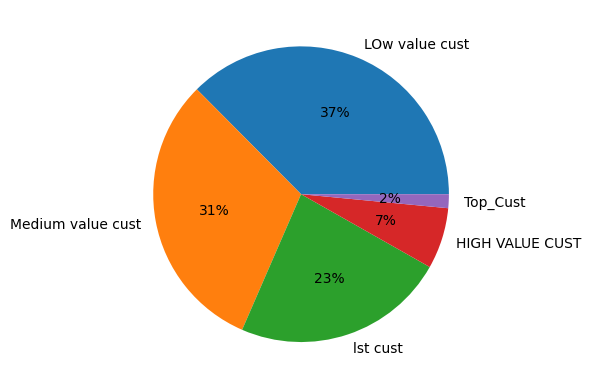

In [ ]:
plt.pie(rfm_data.Customer_segment.value_counts(),labels=rfm_data.Customer_segment.value_counts().index,autopct='%.0f%%')
plt.show()